In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from pyfonts import load_font
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text

In [2]:
regular = load_font(
    font_url="https://github.com/google/fonts/blob/main/ofl/averialibre/AveriaLibre-Regular.ttf?raw=true"
)

bold = load_font(
    font_url="https://github.com/google/fonts/blob/main/ofl/averialibre/AveriaLibre-Bold.ttf?raw=true"
)

In [3]:
palmtrees = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-18/palmtrees.csv", encoding="ISO-8859-1")

In [4]:
palmtrees = palmtrees[["palm_subfamily", "max_leaf_number", "max_fruit_length_cm", "max_fruit_width_cm"]]

In [5]:
df = palmtrees.groupby(["palm_subfamily"]).agg(avg_leaf_number=("max_leaf_number", "mean"),
                                               avg_fruit_length_cm = ("max_fruit_length_cm", "mean"),
                                               avg_fruit_width_cm = ("max_fruit_width_cm", "mean"))

In [6]:
df = df.reset_index()

In [7]:
df

,palm_subfamily,avg_leaf_number,avg_fruit_length_cm,avg_fruit_width_cm
0,Arecoideae,11.429622,2.862344,1.911491
1,Calamoideae,13.228571,4.046495,2.838763
2,Ceroxyloideae,20.000000,3.356800,3.347778
3,Coryphoideae,23.816850,3.450368,2.282529
4,Nypoideae,15.000000,15.000000,10.000000


In [8]:
xy_ticklabel_color = "#757C85"

In [9]:
categories = ["Average leaf number", "Average fruit\nlength (cm)", "Average fruit\nwidth (cm)"]
names = df.palm_subfamily
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.append(angles, angles[0])  

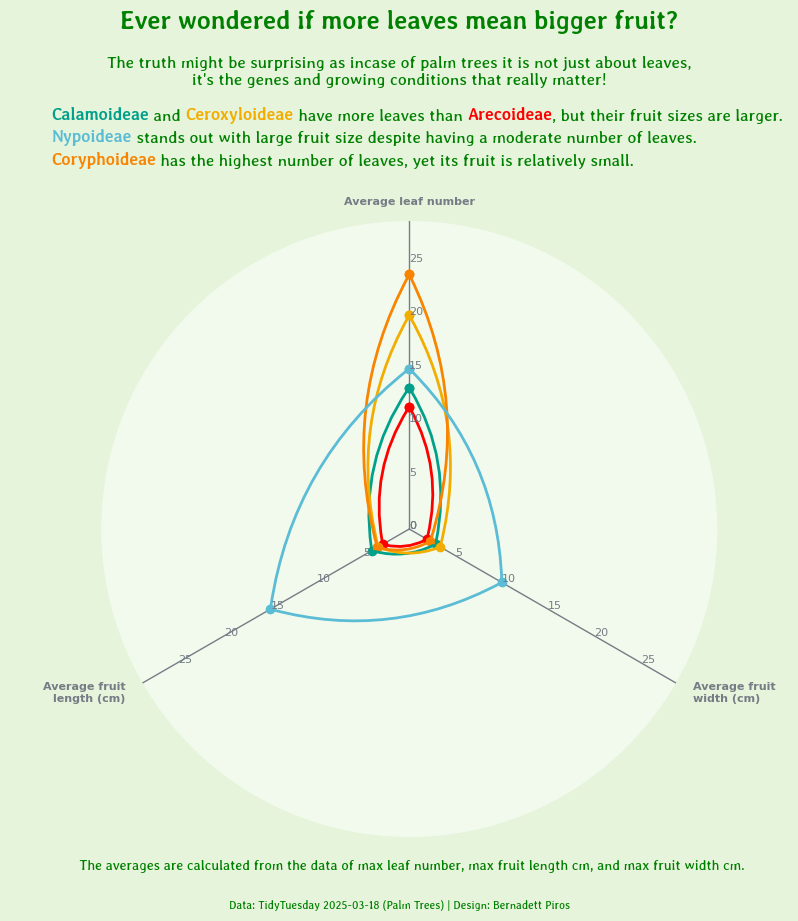

In [45]:
cmap = load_cmap("Darjeeling1")
colors = cmap.colors

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

for i, row in df.iterrows():
    values = row[1:].tolist()
    values.append(values[0])  
    ax.scatter(angles, values, color=colors[i])  
    for j in range(len(categories)):
        ang_start, ang_end = angles[j], angles[(j + 1) % len(categories)]
        val_start, val_end = values[j], values[(j + 1) % len(values)]
        ax.annotate("", xy=(ang_end, val_end), xytext=(ang_start, val_start),
                    arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.2',
                                    color=colors[i], linewidth=2, linestyle='-', antialiased=True))

ax.set_theta_zero_location('N')
ax.spines["polar"].set_color("none")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=8, color=xy_ticklabel_color, weight="bold")  
ax.set_rlim(0, max(df.iloc[:, 1:].max()) + 5)

for angle in angles[:-1]:
    for i in range(0, int(max(df.iloc[:, 1:].max())) + 5, 5):
        ax.text(angle, i, str(i), size=8, color=xy_ticklabel_color)
    ax.plot([angle, angle], [0, max(df.iloc[:, 1:].max())+5], color=xy_ticklabel_color, lw=1, zorder=0)


for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('right')
  else:
    label.set_horizontalalignment('left')


ax.set_rticks([])
ax.grid(False)

fig.text(0.5, 1.12, "Ever wondered if more leaves mean bigger fruit?",
        ha="center", color="green", font=bold, size=18)

fig.text(0.5, 1.05, "The truth might be surprising as incase of palm trees it is not just about leaves,\nit's the genes and growing conditions that really matter!",
        ha="center", color="green", font=regular, size=12)

txt1 = '''
        <Calamoideae> and <Ceroxyloideae> have more leaves than <Arecoideae>, but their fruit sizes are larger.
        <Nypoideae> stands out with large fruit size despite having a moderate number of leaves.
        <Coryphoideae> has the highest number of leaves, yet its fruit is relatively small.  '''

fig_text(0.5, 1.03, s=txt1, ha="center", color="green", font=regular, size=12,
        highlight_textprops=[
            {"color": colors[1], "font": bold},
            {"color": colors[2], "font": bold},
            {"color": colors[0], "font": bold},
            {"color": colors[4], "font": bold},
            {"color": colors[3], "font": bold}])

txt2 = '''
       The averages are calculated from the data of max leaf number, max fruit length cm, and max fruit width cm.
       '''

fig.text(0.5, 0.05, s=txt2, ha="center", color="green", font=regular)

fig.text(0.5, 0.02, s="Data: TidyTuesday 2025-03-18 (Palm Trees) | Design: Bernadett Piros", ha="center", color="green", font=regular, size=8)

ax.set_facecolor("#F2FAED")
fig.set_facecolor("#E6F4DB")

plt.show()

#fig.savefig("table_pixar.png", bbox_inches='tight', pad_inches=0.2, dpi=300)
#fig.savefig("2025-03-18.png", bbox_inches='tight', pad_inches=0.2)